# Scikit-learn Primer

**Scikit-learn** (http://scikit-learn.org/) is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.

In this section we'll perform a fairly simple classification exercise with scikit-learn. In the next section we'll leverage the machine learning strength of scikit-learn to perform natural language classifications.

## Perform Imports and Load Data
For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>You can check out the [**sms_readme**](../TextFiles/sms_readme.txt) file for more info.

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [1]:
import numpy as np
import pandas as pd

# load the dataset

df = pd.read_csv("resources/TextFiles/smsspamcollection.tsv", sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [2]:
# Lets look at the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
label      5572 non-null object
message    5572 non-null object
length     5572 non-null int64
punct      5572 non-null int64
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [3]:
# Check for missing values
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

## Visualize the data:
Since we're not ready to do anything with the message text, let's see if we can predict ham/spam labels based on message length and punctuation counts. We'll look at message `length` first:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ham     4825
spam     747
Name: label, dtype: int64


Text(0.5, 1.0, 'Distribution of Labels')

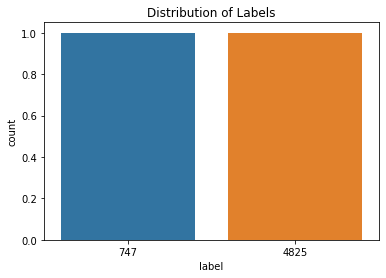

In [5]:
# Lets visualize the label
print(df['label'].value_counts())

sns.countplot(df['label'].value_counts())
plt.title("Distribution of Labels")

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64


Text(0.5, 1.0, 'Distribution of Message Length')

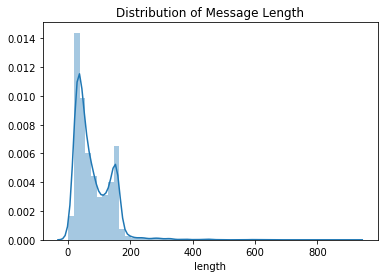

In [6]:
# Lets visualize the length variable

print(df['length'].describe())

# The data looks to be extremelt skewed
sns.distplot(df['length'])
plt.title('Distribution of Message Length')

<font color=blue>This dataset is extremely skewed. The mean value is 80.5 and yet the max length is 910. Let's plot this on a logarithmic x-axis.</font>

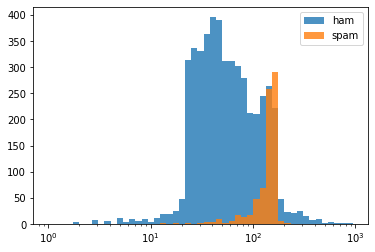

In [8]:
plt.xscale('log')
bins = 1.15 ** (np.arange(0, 50))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins, alpha=0.8)
plt.legend(['ham', 'spam'])

<font color=green>It looks like there's a small range of values where a message is more likely to be spam than ham.</font>

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64


Text(0.5, 1.0, 'Distribution of Punct')

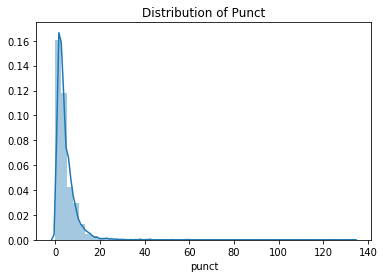

In [9]:
# Lets visualize the punct variable

print(df['punct'].describe())

# The data looks to be extremelt skewed
sns.distplot(df['punct'])
plt.title('Distribution of Punct')

Text(0.5, 1.0, 'Distribution of Punct amongst ham and spam')

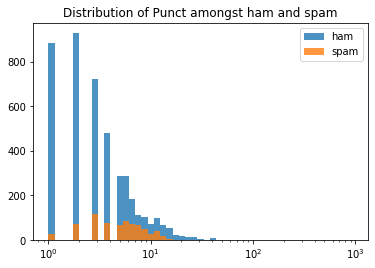

In [10]:
# This is also a skewed a distribution
plt.xscale('log')
bins = 1.15 ** (np.arange(0, 50))
plt.hist(df[df['label'] == 'ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins=bins, alpha=0.8)
plt.legend(['ham', 'spam'])
plt.title("Distribution of Punct amongst ham and spam")

We see isolation of spam messages from ham is not easily interpretable

___
## Split the data into train & test sets:

If we wanted to divide the DataFrame into two smaller sets, we could use
> `train, test = train_test_split(df)`

For our purposes let's also set up our Features (X) and Labels (y). The Label is simple - we're trying to predict the `label` column in our data. For Features we'll use the `length` and `punct` columns. *By convention, **X** is capitalized and **y** is lowercase.*

## Selecting features
There are two ways to build a feature set from the columns we want. If the number of features is small, then we can pass those in directly:
> `X = df[['length','punct']]`

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:
> `X = df.drop(['label','message'], axis=1)`

These operations make copies of **df**, but do not change the original DataFrame in place. All the original data is preserved.

In [11]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

### Additional train/test/split arguments:
The default test size for `train_test_split` is 30%. Here we'll assign 33% of the data for testing.<br>
Also, we can set a `random_state` seed value to ensure that everyone uses the same "random" training & testing sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f'Training Data Shape: {X_train.shape}')
print(f'Testing Data Shape: {X_test.shape}')

Training Data Shape: (3733, 2)
Testing Data Shape: (1839, 2)


___
## Train a Logistic Regression classifier
One of the simplest multi-class classification tools is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Scikit-learn offers a variety of algorithmic solvers; we'll use [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). 

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Test the Accuracy of the Model

In [15]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [16]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


<font color=blue>These results are terrible! More spam messages were confused as ham (241) than correctly identified as spam (5), although a relatively small number of ham messages (46) were confused as spam.</font>

In [17]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



<font color=blue>This model performed *worse* than a classifier that assigned all messages as "ham" would have!</font>

___
## Train a naïve Bayes classifier:
One of the most common - and successful - classifiers is [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Run predictions and report on metrics

In [19]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


<font color=blue>The total number of confusions dropped from **287** to **256**. [241+46=287, 246+10=256]</font>

In [20]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [21]:
print(metrics.accuracy_score(y_test, predictions))

0.8607939097335509


<font color=blue>Better, but still less accurate than 86.6%</font>

___
## Train a support vector machine (SVM) classifier
Among the SVM options available, we'll use [C-Support Vector Classification (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [22]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Run predictions and report on metrics

In [23]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1515   78]
 [ 131  115]]


In [24]:
print(metrics.classification_report(y_test,predictions))
print(f'Accuracy of the model : {metrics.accuracy_score(y_test,predictions)}')

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839

Accuracy of the model : 0.8863512778684067


<font color=blue>And finally we have a model that performs *slightly* better than random chance.</font>